<font color='navy'> 
    
# Creating a Simple AI Application: Implementing Software Engineering Best Practices
    
</font>

## Introduction:
In this notebook, we will implement best practices in software engineering to develop a simple AI application that predicts the onset of diabetes in a patient based on various health parameters. The goal of this project is to use the health attributes to build a model that accurately predicts whether a patient has diabetes or not. To achieve this goal, we will follow best practices in software engineering, including testing, logging, and feature engineering. The model will be evaluated using accuracy as the evaluation metric, and we will aim to achieve an accuracy of at least 75%. By the end of this notebook, you will learn how to implement best practices in software engineering to develop a simple AI application that predicts the onset of diabetes in a patient.

## Objectives:
The main objectives of this Jupyter notebook are:
* To understand the importance of software engineering best practices in artificial intelligence.
* To learn how to implement software engineering best practices such as testing and logging in a simple AI application using tabular data.
* To gain hands-on experience in developing a basic AI application.

## Tools and Libraries
For this Jupyter notebook, we will need the following tools and libraries:

1. Python 3.x
2. Jupyter Notebook
3. Pandas library for data manipulation and analysis
4. Numpy library for mathematical operations
5. Scikit-learn library for machine learning algorithms
6. Matplotlib library for data visualization
7. Seaborn library for data visualization
8. Unittest for testing
9. Logging for logging and monitoring

## Data:
The data for this project will be obtained from the Pima Indians Diabetes Database, which is publicly available on the UCI Machine Learning Repository website. The Pima Indians Diabetes Database contains information about patients from the Pima Indian population in Arizona. The data includes 8 health attributes, such as the patient's age, BMI, and blood pressure, as well as a binary target variable indicating whether the patient has diabetes or not.

## 1. Importing Libraries and Loading Data
Let's start by importing the necessary libraries and loading the Diabetes dataset.

In [1]:
# Importing Required Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import logging
import unittest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


## 2. Loading the diabetes dataset

In [2]:
# Loading the data
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
data = pd.read_csv(url, header=None)

# Adding column names to the data
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
diabetes_data = pd.DataFrame(data.values, columns=columns)
diabetes_data.head()


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


## 3. Exploratory Data Analysis
In this section, exploratory data analysis (EDA) is performed on the diabetes dataset. The purpose of the EDA is to better understand the structure and relationships between the variables in the dataset. This includes generating descriptive statistics and creating visualizations.

Number of missing values in each column:
preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64
Descriptive statistics:
             preg        plas        pres        skin        test        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean 

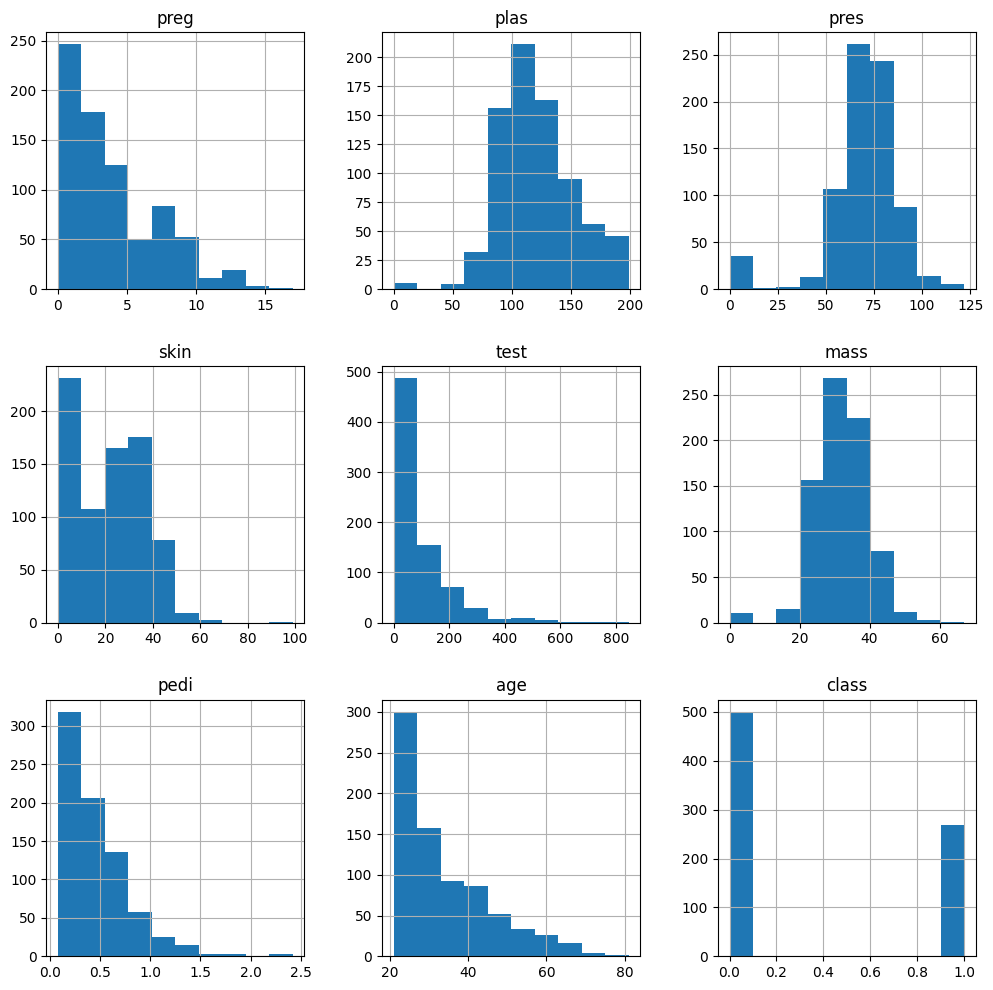

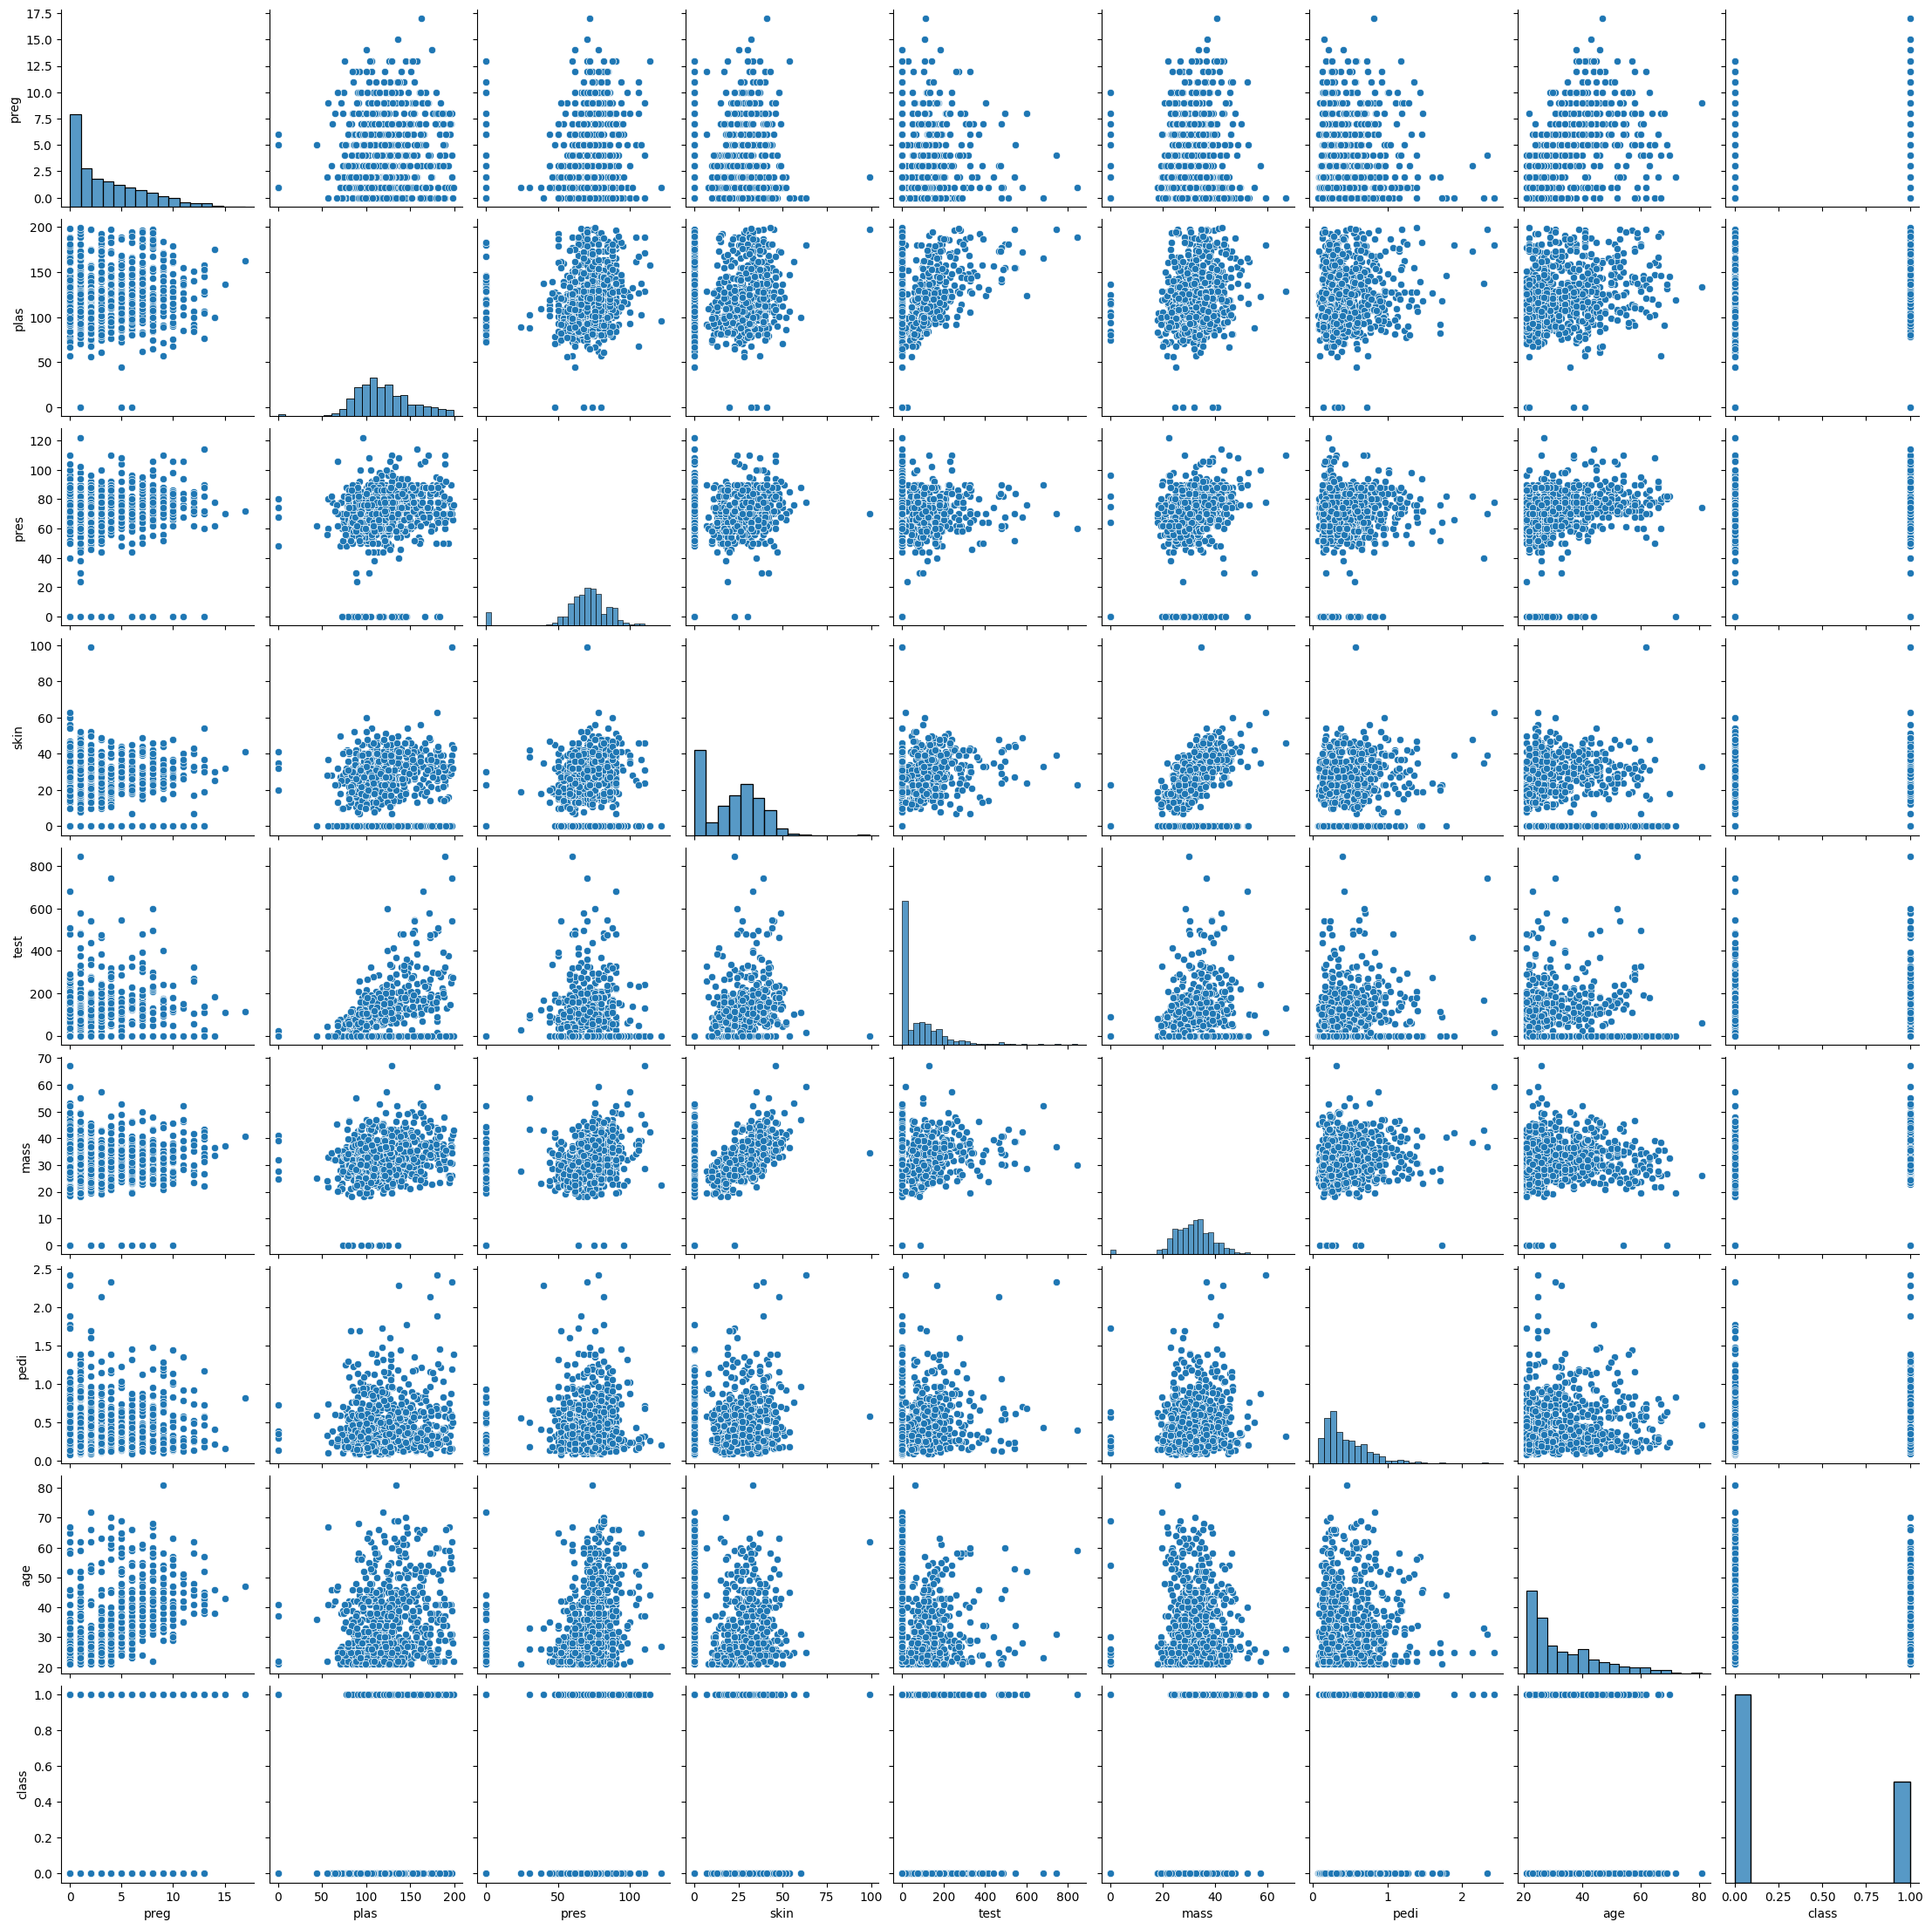

In [3]:
## Checking for Missing Values
print('Number of missing values in each column:')
print(diabetes_data.isnull().sum())

# Generate descriptive statistics
print('Descriptive statistics:')
print(diabetes_data.describe())

# Create histograms for each variable
diabetes_data.hist(figsize=(12,12))
plt.show()

# Create a pairplot to visualize the relationships between the variables
sns.pairplot(diabetes_data)
plt.show()

## 4. Feature Engineering
After exploring the data, it is important to engineer new features that can improve the performance of the machine learning model. Feature engineering can involve combining existing features, transforming existing features, or creating new features based on domain knowledge. In this section, we will be performing feature engineering on our data. This process includes standardizing the data, and performing feature selection using the f_regression method. Then, we will plot the scores of each feature to visualize which features have the most impact on our target variable.


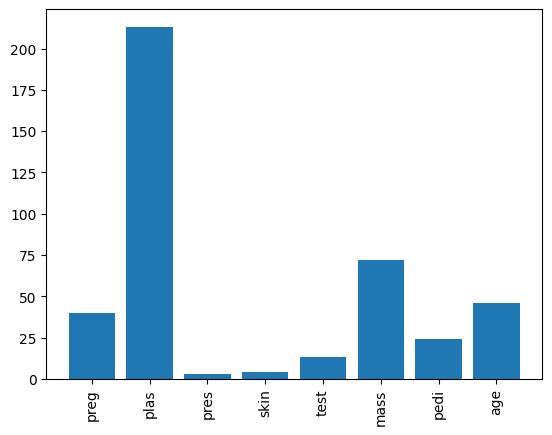

In [4]:
# Correlation Matrix
corr = diabetes_data.corr()

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(diabetes_data.drop(['class'], axis=1))

# Feature Selection
best_features = SelectKBest(score_func=f_regression, k=5)
best_features.fit(scaled_data, diabetes_data['class'])
scores = best_features.scores_

# Plotting the scores
plt.bar(range(len(columns[:-1])), scores)
plt.xticks(range(len(columns[:-1])), columns[:-1], rotation=90)
plt.show()

## 5. Model Development
Now that we have performed some Exploratory Data Analysis, let's move on to developing a simple AI model. We will use the Decision Tree algorithm for our model.

In [5]:
## Splitting the data into training and testing sets
X = diabetes_data.drop(['class'], axis=1)
y = diabetes_data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Training the Model
clf = RandomForestClassifier()
param_grid = {
    'n_estimators': [200, 500],
    'max_depth': [3, 5, 7, 9],
    'min_samples_leaf': [1, 2, 4, 16]
}
grid_search = GridSearchCV(clf, param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

## Model Performance
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7922077922077922


## 6. Additional Model Evaluation
After training the model, it is important to evaluate its performance. This can be done using various metrics like confusion matrix and classification report. In this section, we will evaluate the performance of the trained model using various metrics.

              precision    recall  f1-score   support

     class 0       0.80      0.93      0.86       107
     class 1       0.74      0.49      0.59        47

    accuracy                           0.79       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.79      0.79      0.78       154



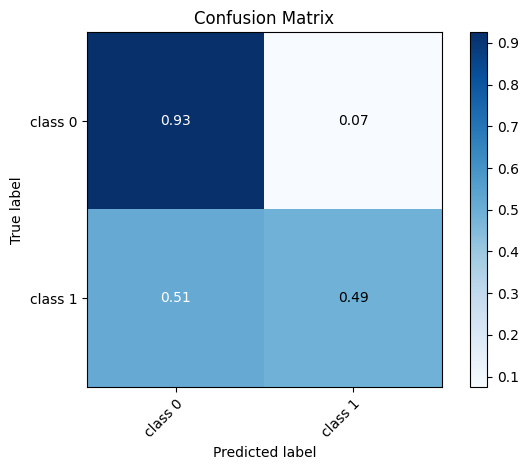

/home/jarla/miniconda3/envs/DVAE26/lib/python3.10/site-packages/sklearn/utils/_plotting.py:379: FutureWarning: `estimator_name` is deprecated in 1.7 and will be removed in 1.9. Use `name` instead.
  warnings.warn(


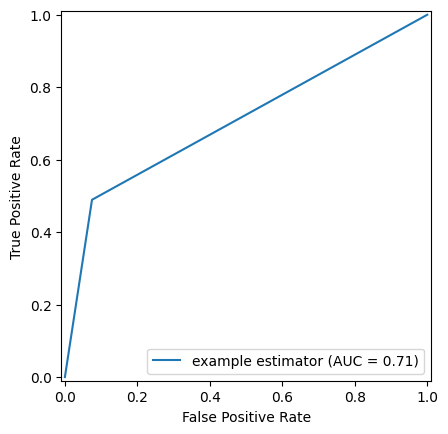

AUC Score: 0.7072976734937363


In [6]:
## Confusion Matrix and Classification Report

# Getting the classification report
cr = classification_report(y_test, y_pred, target_names=['class 0', 'class 1'])
print(cr)

# Plotting the bar chart
cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=['class 0', 'class 1'], yticklabels=['class 0', 'class 1'],
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], '.2f'),
                ha="center", va="center",
                color="white" if cm[i, j] > 0.5 else "black")
fig.tight_layout()
plt.show()
# Plotting the Actual vs. Predicted values
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

# Calculate AUC Score, the AUC Score is the area under the ROC curve
auc_score = metrics.roc_auc_score(y_test, y_pred)
print("AUC Score:", auc_score)


## 7. Logging and Testing
Now that we have trained and evaluated our model, let's implement software engineering best practices such as logging and testing.

In [7]:
# Logging
# Configuring the logging
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)
logging.basicConfig(filename='diabetes_prediction.log', level=logging.INFO,
                    format='%(asctime)s:%(levelname)s:%(message)s')
logging.info('Model Trained')
logging.info("Best parameters found: {}".format(grid_search.best_params_))
logging.info('Model Performance')
logging.info('Accuracy: {}'.format(accuracy))
logging.info("Best score found: {}".format(grid_search.best_score_))
logging.info('AUC Score: {}'.format(auc_score))
logging.info('Confusion Matrix: {}'.format(cm))
logging.info('Classification Report: {}'.format(cr))


# Testing
class TestDiabetesPredictionModel(unittest.TestCase):
    # Testing the accuracy
    def test_accuracy(self):
        self.assertGreater(accuracy, 0.75)
    # Testing the AUC Score
    def test_auc_score(self):
        self.assertGreater(auc_score, 0.7)


## Running the tests

In [8]:
if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)
    with open("diabetes_prediction.log", "r") as f:
        print(f.read())


..
----------------------------------------------------------------------
Ran 2 tests in 0.002s

OK


2025-12-09 10:46:57,566:INFO:Model Trained
2025-12-09 10:46:57,566:INFO:Best parameters found: {'max_depth': 9, 'min_samples_leaf': 16, 'n_estimators': 200}
2025-12-09 10:46:57,566:INFO:Model Performance
2025-12-09 10:46:57,567:INFO:Accuracy: 0.7987012987012987
2025-12-09 10:46:57,567:INFO:Best score found: 0.7621791806153356
2025-12-09 10:46:57,567:INFO:AUC Score: 0.7239013720421554
2025-12-09 10:46:57,568:INFO:Confusion Matrix: [[0.91588785 0.08411215]
 [0.46808511 0.53191489]]
2025-12-09 10:46:57,568:INFO:Classification Report:               precision    recall  f1-score   support

     class 0       0.82      0.92      0.86       107
     class 1       0.74      0.53      0.62        47

    accuracy                           0.80       154
   macro avg       0.78      0.72      0.74       154
weighted avg       0.79      0.80      0.79       154

2025-12-09 10:48:54,299:INFO:Model Trained
2025-12-09 10:48:54,299:INFO:Best parameters found: {'max_depth': 5, 'min_samples_leaf': 4, '

In [9]:
import torch
torch.cuda.is_available(), torch.cuda.get_device_name(0)

(True, 'NVIDIA GeForce GTX 980 Ti')